In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

In [13]:
# Combine speed restriction data for 2025
jan_speed_restrictions = pd.read_csv('2025-01_Speed_Restrictions_By_Day.csv')
feb_speed_restrictions = pd.read_csv('2025-02_Speed_Restrictions_By_Day.csv')

combined_speed_restrictions = pd.concat([jan_speed_restrictions, feb_speed_restrictions])

# fix dates
combined_speed_restrictions['Calendar_Date'] = pd.to_datetime(combined_speed_restrictions['Calendar_Date'])\

# Group to get restriction count
grouped_speed_restrictions = combined_speed_restrictions.groupby(by="Branch", as_index=False)["Restriction_Days_Active_On_Calendar_Day"].sum()
grouped_speed_restrictions

/var/folders/bt/rgg9yqr13yx2d89bpshqr0fw0000gn/T/ipykernel_45821/1489884181.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_speed_restrictions['Calendar_Date'] = pd.to_datetime(combined_speed_restrictions['Calendar_Date'])\


,Branch,Restriction_Days_Active_On_Calendar_Day
0,Blue Line,1
1,Green Line - B,1
2,Green Line - C,7
3,Green Line Trunk,77
4,Orange Line,13
5,Red Line - Ashmont,24
6,Red Line - Braintree,26
7,Red Line - Mattapan,45


Text(0.5, 1.0, 'Reported Speed Restrictions by Line in 2025')

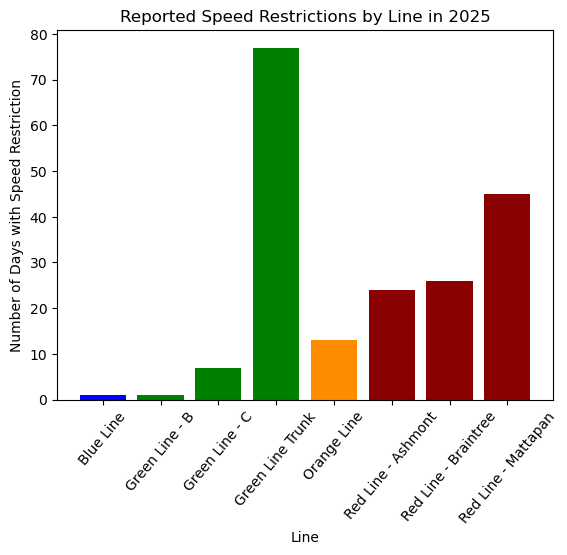

In [29]:
# bar plot (frequency of speed restictions by line)
colors = ['blue', 'green', 'green', 'green', 'darkorange', 'darkred', 'darkred', 'darkred']
plt.bar(grouped_speed_restrictions['Branch'], grouped_speed_restrictions['Restriction_Days_Active_On_Calendar_Day'], color = colors)
plt.ylabel("Number of Days with Speed Restriction")
plt.xlabel("Line")
plt.xticks(rotation=50)
plt.title("Reported Speed Restrictions by Line in 2025")

In [11]:
ridership_data = pd.read_csv('MBTA_Monthly_Ridership_By_Mode_and_Line.csv')

# fix dates (remove times)
ridership_data['month_of_service'] = pd.to_datetime(ridership_data['month_of_service'])

# exclude missing ridership data
filtered_ridership = ridership_data[pd.notnull(ridership_data.ridership_total)]
filtered_ridership = filtered_ridership[filtered_ridership.daytype == "Total"]

# filter by most popular lines
pop_lines = ['Bus', 'Commuter Rail', 'Green Line', 'Orange Line', 'Red Line', 'Silver Line', 'Blue Line']
filtered_ridership = filtered_ridership[filtered_ridership['route_or_line'].isin(pop_lines)]

filtered_ridership

,month_of_service,daytype,daycount,route_or_line,ridership_total,ridership_average,ObjectId
39,2024-12-01 05:00:00+00:00,Total,31,Blue Line,1171243,37782,40
40,2024-12-01 05:00:00+00:00,Total,31,Orange Line,2790184,90006,41
41,2024-12-01 05:00:00+00:00,Total,31,Red Line,2989665,96441,42
43,2024-12-01 05:00:00+00:00,Total,31,Green Line,2222646,71698,44
46,2024-12-01 05:00:00+00:00,Total,31,Silver Line,836989,27000,47
...,...,...,...,...,...,...,...
3989,2019-02-01 05:00:00+00:00,Total,28,Green Line,4278179,152792,3990
3991,2019-02-01 05:00:00+00:00,Total,28,Silver Line,827339,29548,3992
3992,2019-02-01 05:00:00+00:00,Total,28,Bus,7502531,267948,3993
3996,2019-02-01 05:00:00+00:00,Total,28,Commuter Rail,2384857,85173,3997


In [28]:
# Ridership Line Plot
# Create a selection widget for filtering
line_selection = alt.selection_multi(fields=['route_or_line'], bind='legend')

# Changing colors to match line
color_scale = alt.Scale(domain=pop_lines,
                        range=['goldenrod', 'purple', 'green', 'darkorange', 'red', 'silver', 'blue']) 

alt.Chart(filtered_ridership).mark_line().encode(
    alt.X('month_of_service:T', title="Month of Service", axis=alt.Axis(format="%b %Y")),
    alt.Y('ridership_total:Q', title="Total Ridership"),
    color=alt.Color('route_or_line:N', scale=color_scale, legend=alt.Legend(title="Route or Line")),
    tooltip=['month_of_service:T', 'ridership_total:Q', 'route_or_line:N'],
    opacity=alt.condition(line_selection, alt.value(1), alt.value(0.1))
).properties(
    width = 400, height = 400,
    title="Ridership Over Time"
).add_selection(
    line_selection
)

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=

alt.Chart(...)